## GERDA LIGHT
This notebook is meant to test out and use the reduced  version of GERDA.

The "Light" version build upon the synthetic population created with the orginial GERDA by using the agent_information Dataframe (*ai.df) and the contact table p_l_t, which states the location ID for all agents for all timesteps (hours) for one week.

Worklfow:
- create a new world object 
- initialize a model with this world object
- set seed infections
- simulate the model 


PS.: ## - comment,  # - hide lines


In [17]:
import GERDA_light as gl 
import numpy as np
import logging as log
import matplotlib.pyplot as plt
logger = log.getLogger()
logger.setLevel(log.INFO)

In [13]:
## initialize a world 
w1 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           )
# w2 = gl.World(
#            p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
#            ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
#            clustering=True,
#            k_I=0.2,
#            )

INFO:root:create contact list
INFO:root:contact list is done
INFO:root:max cluster size: 1


In [16]:
model = gl.SIS_model(w1)#no clustering
i = 1   # selected agent ID 
model.world.agents[i].state=1 ## infect one agent
model.world.agents[i].times['infection'] = 0 
model.run(timespan=2000, only_inf_rel_contacts=True)

INFO:root:create contact list


iter:  1


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times


In [3]:
## initialize a model 
model1 = gl.SIS_model(w1)#no clustering
model2 = gl.SIS_model(w2)#clustering

## infect an agent 
for model in [model1,model2]:
    i = 1   # selected agent ID 
    model.world.agents[i].state=1 ## infect one agent
    model.world.agents[i].times['infection'] = 0 


INFO:root:create contact list


iter:  1


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:create contact list


iter:  55


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection time

In [4]:
## run a simulation
for model in [model1,model2]:
    model.run(timespan=2000, only_inf_rel_contacts=True)

In [5]:
ai_df_1 = model1.world.ai_df
ai_df_2 = model2.world.ai_df
display(ai_df_1.head(5))
display(ai_df_2.head(5))


,home,h_ID,type,age,cluster,household_size,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,400,4,1,866.0,0,866.0
1,152,265,under_age,16,265,5,1,752.0,0,752.0
2,205,373,public_worker,34,373,2,1,971.0,0,971.0
3,564,1059,adult,53,1059,2,1,983.0,0,983.0
4,100,177,adult,40,177,2,1,807.0,0,807.0


,home,h_ID,type,age,household_size,cluster,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,4,161,4,437.0,0,437.0
1,152,265,under_age,16,5,214,5,210.0,0,210.0
2,205,373,public_worker,34,2,142,2,441.0,0,441.0
3,564,1059,adult,53,2,50,2,351.0,0,351.0
4,100,177,adult,40,2,71,8,255.0,0,255.0


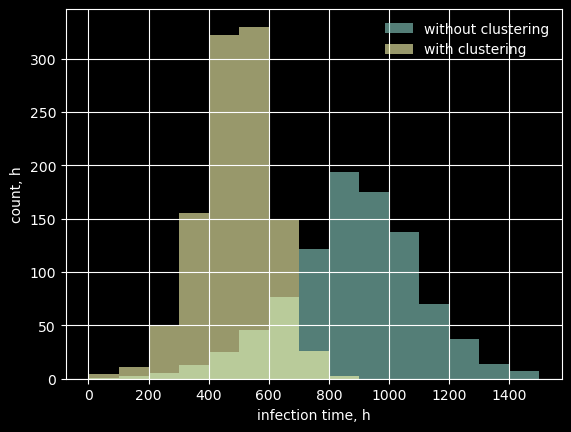

In [12]:
import numpy as np
ai_df_1['infection_time'].hist(alpha=0.6,label='without clustering',bins=np.arange(0,1600,100))
ai_df_2['infection_time'].hist(alpha=0.6,label='with clustering', bins=np.arange(0,1600,100))
plt.xlabel('infection time, h')
plt.ylabel('count, h')
plt.legend(frameon=False)

INFO:root:create contact list


iter:  1


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:create contact list


iter:  55


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection time

iter:  1


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:create contact list


iter:  55


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection time

iter:  1


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:create contact list


iter:  55


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection time

iter:  1


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:create contact list


iter:  55


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection time

iter:  1


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:create contact list


iter:  55


INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection times
INFO:root:run test for mean infection time

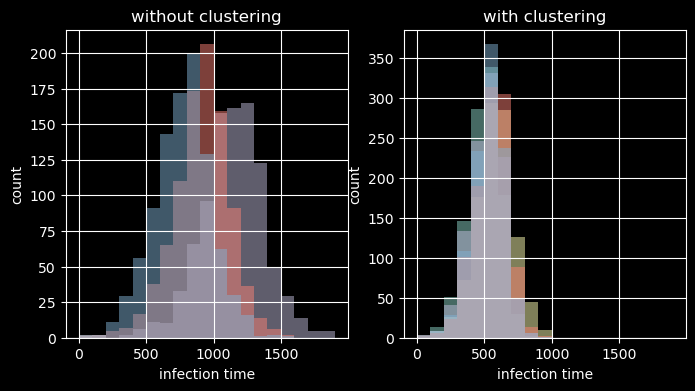

In [18]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
inf_times = []
for k in range(5):
    for l,model in enumerate([model1,model2]):
        model.reset()
        i = 1   # selected agent ID 
        model.world.agents[i].state=1 ## infect one agent
        model.world.agents[i].times['infection'] = 0
        model.run(timespan=2000)
        inf_times.append(model.world.ai_df[['h_ID','infection_time']])
        model.world.ai_df['infection_time'].hist(alpha=0.5, ax = axes[l], bins=np.arange(0,2000,100))

axes[0].set_title(f'without clustering')
axes[1].set_title(f'with clustering')
for ax in axes:
    ax.set_ylabel('count')
    ax.set_xlabel('infection time')
     

array([[<Axes: title={'center': 'infection_time'}>]], dtype=object)

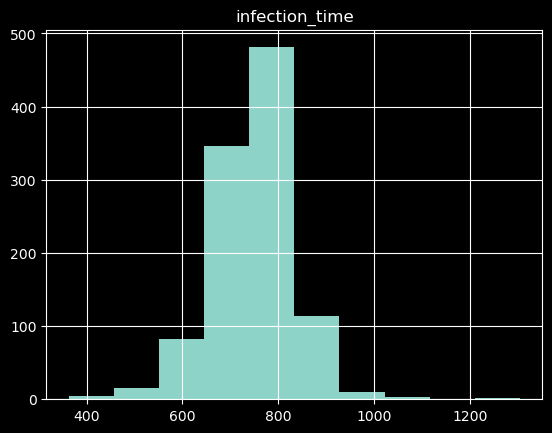

In [8]:
import pandas as pd
ai_combined = pd.concat(inf_times,axis=0)
#pd.merge(on='h_ID')
ai_combined.groupby('h_ID').mean().hist()